In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
cluster1 = np.random.uniform(0.5, 1.5, (2,10)) # size=row2Xcol10
cluster2 = np.random.uniform(3.5, 4.5, (2,10))

In [3]:
cluster1

array([[1.49097949, 0.52426407, 0.57137284, 0.5335595 , 1.0559915 ,
        0.56038131, 0.86285626, 0.64559335, 1.26645334, 1.27632836],
       [1.48265491, 1.10650681, 1.37098016, 0.65925315, 0.83348954,
        0.93344481, 1.23892178, 1.18393727, 0.9461439 , 1.15338708]])

In [4]:
X = np.hstack((cluster1, cluster2)).T

In [5]:
X

array([[1.49097949, 1.48265491],
       [0.52426407, 1.10650681],
       [0.57137284, 1.37098016],
       [0.5335595 , 0.65925315],
       [1.0559915 , 0.83348954],
       [0.56038131, 0.93344481],
       [0.86285626, 1.23892178],
       [0.64559335, 1.18393727],
       [1.26645334, 0.9461439 ],
       [1.27632836, 1.15338708],
       [3.69557891, 4.45319622],
       [4.1727799 , 3.76099631],
       [3.85199942, 3.97228737],
       [4.05595408, 3.60430484],
       [3.78672607, 4.00056365],
       [4.27039369, 3.90713446],
       [4.14019572, 4.21816267],
       [4.16079387, 4.14706   ],
       [4.03470388, 3.94091736],
       [4.05776549, 4.26863927]])

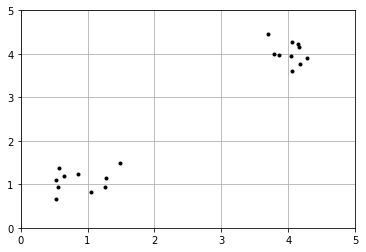

In [6]:
plt.figure()
plt.axis([0,5,0,5])
plt.grid()
plt.plot(X[:,0],X[:,1],'k.')

In [7]:
K = range(1,11)

In [8]:
meandistortions = []

In [9]:
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    meandistortions.append(
    sum(np.min(cdist(X,km.cluster_centers_, metric='euclidean'), axis=1))/X.shape[0])
    print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[0 2 2 2 0 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1]
[2 0 0 0 2 0 0 0 2 2 1 3 1 3 1 3 1 1 3 1]
[2 0 0 0 3 0 0 0 3 3 1 4 1 4 1 4 1 1 4 1]
[3 4 0 4 5 4 0 0 5 5 2 1 2 1 2 1 2 2 1 2]
[4 5 5 0 2 0 5 5 2 2 3 1 6 1 6 1 3 3 1 3]
[2 0 5 0 3 0 5 5 3 3 6 7 1 7 1 7 4 4 1 4]
[0 2 2 4 3 4 7 2 3 3 6 8 1 8 1 8 5 5 1 5]
[5 1 1 4 8 4 9 1 8 2 3 7 0 7 0 7 6 6 0 6]


Text(0,0.5,'mean distortions')

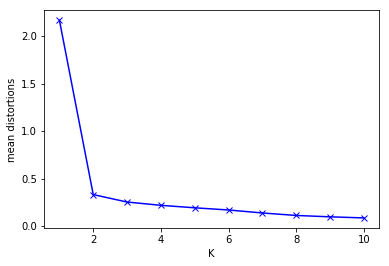

In [10]:
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('K')
plt.ylabel('mean distortions')

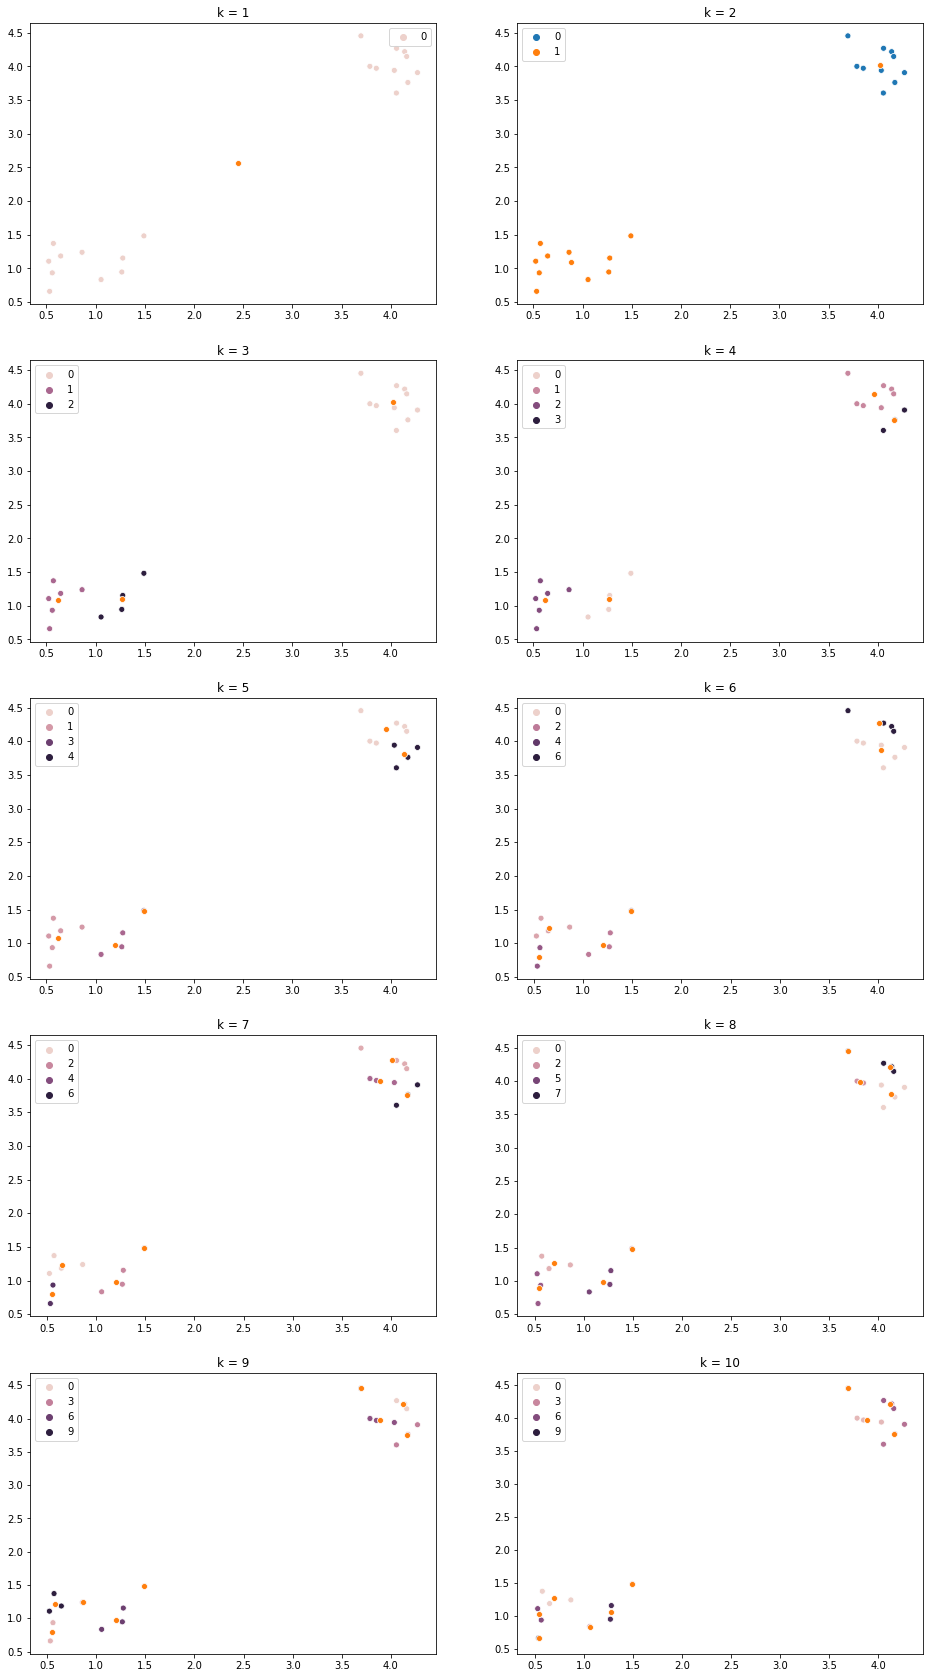

In [11]:
fig = plt.figure(figsize=(16,30))
for k in K:
    ax1 = fig.add_subplot(5,2,k)
    km = KMeans(n_clusters=k)
    km.fit(X)
    ax1 = sns.scatterplot(X[:,0], X[:,1],hue=km.labels_)
    ax1 = sns.scatterplot(km.cluster_centers_[:,0], km.cluster_centers_[:,1],markers='x')
    ax1.set_title('k = {}'.format(k))